# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости.

**Задача** — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных: 
1. Первые вписаны пользователем;
2. Вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Именование-стобцов" data-toc-modified-id="Именование-стобцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Именование стобцов</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски</a></span><ul class="toc-item"><li><span><a href="#ceiling_height" data-toc-modified-id="ceiling_height-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span><code>ceiling_height</code></a></span></li><li><span><a href="#floors_total" data-toc-modified-id="floors_total-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span><code>floors_total</code></a></span></li><li><span><a href="#living_area" data-toc-modified-id="living_area-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span><code>living_area</code></a></span></li><li><span><a href="#is_apartment" data-toc-modified-id="is_apartment-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span><code>is_apartment</code></a></span></li><li><span><a href="#kitchen_area" data-toc-modified-id="kitchen_area-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span><code>kitchen_area</code></a></span></li><li><span><a href="#balcony" data-toc-modified-id="balcony-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span><code>balcony</code></a></span></li><li><span><a href="#city" data-toc-modified-id="city-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span><code>city</code></a></span></li><li><span><a href="#distance_to_nearest_airport" data-toc-modified-id="distance_to_nearest_airport-2.2.8"><span class="toc-item-num">2.2.8&nbsp;&nbsp;</span><code>distance_to_nearest_airport</code></a></span></li><li><span><a href="#distance_to_city_center" data-toc-modified-id="distance_to_city_center-2.2.9"><span class="toc-item-num">2.2.9&nbsp;&nbsp;</span><code>distance_to_city_center</code></a></span></li><li><span><a href="#parks_count_around_3000" data-toc-modified-id="parks_count_around_3000-2.2.10"><span class="toc-item-num">2.2.10&nbsp;&nbsp;</span><code>parks_count_around_3000</code></a></span></li><li><span><a href="#distance_to_nearest_park" data-toc-modified-id="distance_to_nearest_park-2.2.11"><span class="toc-item-num">2.2.11&nbsp;&nbsp;</span><code>distance_to_nearest_park</code></a></span></li><li><span><a href="#ponds_count_around_3000" data-toc-modified-id="ponds_count_around_3000-2.2.12"><span class="toc-item-num">2.2.12&nbsp;&nbsp;</span><code>ponds_count_around_3000</code></a></span></li><li><span><a href="#distance_to_nearest_pond" data-toc-modified-id="distance_to_nearest_pond-2.2.13"><span class="toc-item-num">2.2.13&nbsp;&nbsp;</span><code>distance_to_nearest_pond</code></a></span></li><li><span><a href="#days_exposition" data-toc-modified-id="days_exposition-2.2.14"><span class="toc-item-num">2.2.14&nbsp;&nbsp;</span><code>days_exposition</code></a></span></li><li><span><a href="#Итог-обработки-пропусков" data-toc-modified-id="Итог-обработки-пропусков-2.2.15"><span class="toc-item-num">2.2.15&nbsp;&nbsp;</span>Итог обработки пропусков</a></span></li></ul></li><li><span><a href="#Приведение-типов-данных" data-toc-modified-id="Приведение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Приведение типов данных</a></span></li><li><span><a href="#Поиск-и-обработка-дубликатов" data-toc-modified-id="Поиск-и-обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Поиск и обработка дубликатов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Расчёт-и-добавление-цены-1-квадратного-метра" data-toc-modified-id="Расчёт-и-добавление-цены-1-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчёт и добавление цены 1 квадратного метра</a></span></li><li><span><a href="#Расчёт-и-добавление-дня-недели,-месяца-и-года-публикации" data-toc-modified-id="Расчёт-и-добавление-дня-недели,-месяца-и-года-публикации-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчёт и добавление дня недели, месяца и года публикации</a></span></li><li><span><a href="#Расчёт-и-добавление-этажа-квартиры" data-toc-modified-id="Расчёт-и-добавление-этажа-квартиры-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчёт и добавление этажа квартиры</a></span></li><li><span><a href="#Расчёт-и-добавление-соотношений-площадей:-жилой-и-кухни-к-общей" data-toc-modified-id="Расчёт-и-добавление-соотношений-площадей:-жилой-и-кухни-к-общей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расчёт и добавление соотношений площадей: жилой и кухни к общей</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь-квартиры" data-toc-modified-id="Площадь-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Площадь квартиры</a></span></li><li><span><a href="#Цена-квартиры" data-toc-modified-id="Цена-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Цена квартиры</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-полотков" data-toc-modified-id="Высота-полотков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Высота полотков</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения" data-toc-modified-id="Редкие-и-выбивающиеся-значения-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Редкие и выбивающиеся значения</a></span><ul class="toc-item"><li><span><a href="#Значения-по-цене-квартиры" data-toc-modified-id="Значения-по-цене-квартиры-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Значения по цене квартиры</a></span></li><li><span><a href="#Значения-по-числу-комнат" data-toc-modified-id="Значения-по-числу-комнат-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Значения по числу комнат</a></span></li><li><span><a href="#Значения-по-высоте-потолков" data-toc-modified-id="Значения-по-высоте-потолков-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>Значения по высоте потолков</a></span></li><li><span><a href="#Значения-по-времени-продажи" data-toc-modified-id="Значения-по-времени-продажи-4.6.4"><span class="toc-item-num">4.6.4&nbsp;&nbsp;</span>Значения по времени продажи</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Зависимость-стоимости-от-площади,-числа-комнат,-удаленности-от-центра" data-toc-modified-id="Зависимость-стоимости-от-площади,-числа-комнат,-удаленности-от-центра-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Зависимость стоимости от площади, числа комнат, удаленности от центра</a></span></li><li><span><a href="#Зависимость-стоимости-от-этажа" data-toc-modified-id="Зависимость-стоимости-от-этажа-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Зависимость стоимости от этажа</a></span></li><li><span><a href="#Зависимость-стоимости-от-даты-размещения" data-toc-modified-id="Зависимость-стоимости-от-даты-размещения-4.7.3"><span class="toc-item-num">4.7.3&nbsp;&nbsp;</span>Зависимость стоимости от даты размещения</a></span></li><li><span><a href="#Населенные-пункты-с-низкой-и-высокой-стоимостью-жилья" data-toc-modified-id="Населенные-пункты-с-низкой-и-высокой-стоимостью-жилья-4.7.4"><span class="toc-item-num">4.7.4&nbsp;&nbsp;</span>Населенные пункты с низкой и высокой стоимостью жилья</a></span></li><li><span><a href="#Определение-области-центра-Санкт-Петербурга" data-toc-modified-id="Определение-области-центра-Санкт-Петербурга-4.7.5"><span class="toc-item-num">4.7.5&nbsp;&nbsp;</span>Определение области центра Санкт-Петербурга</a></span></li><li><span><a href="#Квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Квартиры-в-центре-Санкт-Петербурга-4.7.6"><span class="toc-item-num">4.7.6&nbsp;&nbsp;</span>Квартиры в центре Санкт-Петербурга</a></span><ul class="toc-item"><li><span><a href="#Зависимость-стоимости-от-площади,-числа-комнат,-высоты-потолков" data-toc-modified-id="Зависимость-стоимости-от-площади,-числа-комнат,-высоты-потолков-4.7.6.1"><span class="toc-item-num">4.7.6.1&nbsp;&nbsp;</span>Зависимость стоимости от площади, числа комнат, высоты потолков</a></span></li><li><span><a href="#Зависимость-стоимости-от-этажа,-числа-комнат,удаленности-от-центра" data-toc-modified-id="Зависимость-стоимости-от-этажа,-числа-комнат,удаленности-от-центра-4.7.6.2"><span class="toc-item-num">4.7.6.2&nbsp;&nbsp;</span>Зависимость стоимости от этажа, числа комнат,удаленности от центра</a></span></li><li><span><a href="#Зависимость-стоимости-от-даты-публикации" data-toc-modified-id="Зависимость-стоимости-от-даты-публикации-4.7.6.3"><span class="toc-item-num">4.7.6.3&nbsp;&nbsp;</span>Зависимость стоимости от даты публикации</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format) # настройка вывода - до 2х сотых

Чтение файла и запись в переменную `data`. В качестве дополнительного параметра `sep` используем значение `'\t'`, так как именно этот разделитель используется в исходном файле.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Посмотрим на общую информацию о полученных данных. Используем метод `info()`.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим на числовые характеристики. Используем метод `describe()`

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


### Вывод

В таблице 22 столбца. Типы данных:
* `float64` - 14 столбцов;
* `int64` - 3 столбца;
* `object` - 3 столбца;
* `bool` - 2 столбца.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Названия столбцов, состоящих из нескольких слов, лучше записать через "_".
3. Есть неинформативные названия. Нужно переименовать на более понятные.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

В типах данных так же присутствуют ошибки. Например, из документации видно, что должно быть 3 столбца булева типа, а по факту только 2.

Присутствуют и выбивающиеся значения. Например, минимальное значение высоты потолков в `ceiling_height` равно 1 метру. Довольно затруднительно проживать в квартире с такой высотой потолков, поэтому будем считать подобные значения аномальными.

Предварительно, данных для исследования хватает. Однако сначала нужно устранить пропуски и проблемы в именовании. Затем обработать выбивающиеся значения.

## Предобработка данных

### Именование стобцов

Столбцы `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` именованы некорректно. Среди остальных есть неинформативные.

Переименуем:
* `studio` -> `is_studio`;
* `open_plan` -> `is_open_plan`;
* `locality_name` -> `city`;
* `cityCenters_nearest` -> `distance_to_city_center`;
* `airports_nearest` -> `distance_to_nearest_airport`;
* `parks_nearest` -> `distance_to_nearest_park`;
* `ponds_nearest` -> `distance_to_nearest_pond`;
* `parks_around3000` -> `parks_count_around_3000`;
* `ponds_around3000` -> `ponds_count_around_3000`;

Для переименования воспользуемся методом `rename()`.

In [5]:
data = data.rename(columns={
    'studio': 'is_studio',
    'open_plan': 'is_open_plan',
    'locality_name': 'city',
    'cityCenters_nearest': 'distance_to_city_center',
    'airports_nearest': 'distance_to_nearest_airport',
    'parks_nearest': 'distance_to_nearest_park',
    'ponds_nearest': 'distance_to_nearest_pond',
    'parks_around3000': 'parks_count_around_3000',
    'ponds_around3000': 'ponds_count_around_3000'
})

In [6]:
# проверка
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'city', 'distance_to_nearest_airport', 'distance_to_city_center',
       'parks_count_around_3000', 'distance_to_nearest_park',
       'ponds_count_around_3000', 'distance_to_nearest_pond',
       'days_exposition'],
      dtype='object')

### Пропуски

Проверим пропуски:

In [7]:
data.isna().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                  9195
floors_total                      86
living_area                     1903
floor                              0
is_apartment                   20924
is_studio                          0
is_open_plan                       0
kitchen_area                    2278
balcony                        11519
city                              49
distance_to_nearest_airport     5542
distance_to_city_center         5519
parks_count_around_3000         5518
distance_to_nearest_park       15620
ponds_count_around_3000         5518
distance_to_nearest_pond       14589
days_exposition                 3181
dtype: int64

Пропусков довольно много. Будем разбираться с ними поэтапно, начиная с `ceiling_height`.

#### `ceiling_height`

Скорее всего, продавцы просто не указали высоту потолка в объявлении. Рассмотрим столбец подробнее:

In [8]:
data['ceiling_height'].describe()

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

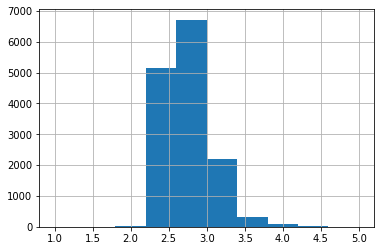

In [9]:
data['ceiling_height'].hist(bins=10, range=(1, 5))

На гистограмме видно, что самыми популярными являются значения в пределах от 2,5 до 3 метров.

Также видим, что в данных по высоте потолков присутствуют странные значения в 1м и 100м. При этом среднее и медианное значения смотрятся реально, как раз в нужных пределах - можно заполнить пропуски. Воспользуемся медианой:

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [11]:
data['ceiling_height'].isna().sum()

0

#### `floors_total`

Данные так же могли не указать. При этом пропусков всего 86, что составляет 0.36%. Поэтому от объявлений с этими пропусками можно избавиться.

In [12]:
data.dropna(subset=['floors_total'], inplace = True)

In [13]:
# проверка
data['floors_total'].isna().sum()

0

#### `living_area`

Аналогично, площадь комнаты могла быть не указана изначально. Посмотрим на числовые характеристики.

In [14]:
data['living_area'].describe()

count   21,743.00
mean        34.46
std         22.04
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

Проверим, есть ли взаимосвязь между площадями, представленными в данных. Для этого создадим сводную таблицу с площадями по городам. Воспользуемся `pivot_table()`.

In [15]:
df_area = data.pivot_table(index='city', values=['total_area', 'living_area', 'kitchen_area'])
df_area

,kitchen_area,living_area,total_area
city,,,
Бокситогорск,6.91,31.94,48.08
Волосово,7.78,28.33,50.18
Волхов,7.38,31.93,49.66
Всеволожск,10.37,30.85,56.02
Выборг,8.95,34.40,56.15
...,...,...,...
село Путилово,7.85,29.30,50.80
село Рождествено,8.15,25.23,49.97
село Русско-Высоцкое,10.59,25.64,49.16


Рассчитаем коэффициент корреляции.

In [16]:
df_area.corr()

,kitchen_area,living_area,total_area
kitchen_area,1.00,0.22,0.50
living_area,0.22,1.00,0.85
total_area,0.50,0.85,1.00


Видим, что наибольшее влияние на общую площадь оказывает жилая часть - 0.85. Площадь кухни так же оказывает влияние, но меньше - 0.50.

#### `is_apartment`

Пропусков очень много - 20924. Данные так же могли быть не указаны при создании объявления, либо пропуски означают то, что это не апартаменты. Заменим на 'False'.

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [18]:
# проверка
data['is_apartment'].isna().sum()

0

#### `kitchen_area`

Пропуски аналогичны жилой площади. Оставляем.

#### `balcony`

Число балконов не указано. Скорее всего это связано с тем, что их нет, поэтому логично будет заменить пропуски на "0".

In [19]:
data['balcony'] = data['balcony'].fillna(0)

In [20]:
# проверка
data['balcony'].isna().sum()

0

#### `city`

В колонке с названием города 49 пропусков. Пропуски составляют 0.21% от всех данных. Поэтому можно не брать в расчет эти объявления.

In [21]:
data.dropna(subset=['city'], inplace = True)

In [22]:
# проверка
data['city'].isna().sum()

0

#### `distance_to_nearest_airport`

Эти данные, как и подобные, являются картографическими - то есть получены автоматически из картографических систем.

Пропуски могли возникнуть по следующим причинам:
* система сбора данных не смогла проложить маршрут или дала сбой;
* есть верхний предел, выше которого система не считает расстояние и возвращает NaN;
* при объединении таблиц, если были несовпадения по столбцам и/или индексам;

Максимальное значение расстояния до ближайшего аэропорта указано 84869 метров. Будем считать, что все пропуски - это значения выше 84869 метров. Тогда данные могут быть сильно искажены.

При этом для исследования `distance_to_nearest_airport` можно не использовать. Удалим столбец.

In [23]:
data.drop(['distance_to_nearest_airport'], axis=1, inplace=True)

#### `distance_to_city_center`

Аналогично предыдущему подпункту с расстоянием до ближайшего аэропорта. Но данные используются в исследовании. Оставим как есть.

#### `parks_count_around_3000`

Скорее всего данных нет по причине того, что в радиусе 3 км парков нет. Заменим пропуски на "0".

In [24]:
data['parks_count_around_3000'] = data['parks_count_around_3000'].fillna(0)

In [25]:
# проверка
data['parks_count_around_3000'].isna().sum()

0

#### `distance_to_nearest_park`

Аналогично пункту 2.2.8. Но используется в исследовании, поэтому оставим.

#### `ponds_count_around_3000`

Аналогично пункту 2.2.10. Заменим на "0".

In [26]:
data['ponds_count_around_3000'] = data['ponds_count_around_3000'].fillna(0)

In [27]:
# проверка
data['ponds_count_around_3000'].isna().sum()

0

#### `distance_to_nearest_pond`

Аналогично пункту 2.2.8. Удаляем.

In [28]:
data.drop(['distance_to_nearest_pond'], axis=1, inplace=True)

#### `days_exposition`

In [29]:
data[data['days_exposition'].isna()]['city'].value_counts()

Санкт-Петербург      2074
Пушкин                 62
Всеволожск             59
Гатчина                39
Мурино                 34
                     ... 
деревня Тойворово       1
Светогорск              1
деревня Сижно           1
деревня Бегуницы        1
деревня Пчева           1
Name: city, Length: 196, dtype: int64

Объявление есть, значит оно опубликовано. Дата публикации тоже есть в данных. Скорее всего пропуски - это те объявления, которые еще не сняты с публикации. Таких публицаций около 11% от общего количества.
Пока оставим, как есть. Если понадобится - заменим на количество дней, полученное от момента публикации объявления с пропуском до сегодняшнего дня.

#### Итог обработки пропусков

In [30]:
data.isna().sum()

total_images                    0
last_price                      0
total_area                      0
first_day_exposition            0
rooms                           0
ceiling_height                  0
floors_total                    0
living_area                  1865
floor                           0
is_apartment                    0
is_studio                       0
is_open_plan                    0
kitchen_area                 2222
balcony                         0
city                            0
distance_to_city_center      5501
parks_count_around_3000         0
distance_to_nearest_park    15535
ponds_count_around_3000         0
days_exposition              3171
dtype: int64

Таким образом после обработки пропусков в таблице остались параметры, которые не были указаны пользователем во время заполнения данных о квартире и пропуски в `days_exposition`, обусловленные тем, что объявления еще не сняты с публикации.

### Приведение типов данных

In [31]:
data.dtypes

total_images                  int64
last_price                  float64
total_area                  float64
first_day_exposition         object
rooms                         int64
ceiling_height              float64
floors_total                float64
living_area                 float64
floor                         int64
is_apartment                   bool
is_studio                      bool
is_open_plan                   bool
kitchen_area                float64
balcony                     float64
city                         object
distance_to_city_center     float64
parks_count_around_3000     float64
distance_to_nearest_park    float64
ponds_count_around_3000     float64
days_exposition             float64
dtype: object

Согласно документации и информации о типах данных можем сказать, что `floors_total`, `balcony`, `parks_count_around_3000`, `ponds_count_around_3000`, `days_exposition` должны иметь тип данных `int64`. При этом `days_exposition` придется оставить в вещественном виде, так как там имеются пропуски.

Так как метод `to_numeric()` приводит к вещественному типу, то воспользуемся методом `astype`.

In [32]:
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['parks_count_around_3000'] = data['parks_count_around_3000'].astype('int64')
data['ponds_count_around_3000'] = data['ponds_count_around_3000'].astype('int64')

Так же нужно привести дату публикации в удобочитаемый формат. Воспользуемся методом `to_datetime()`.

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [34]:
# проверка
data.dtypes

total_images                         int64
last_price                         float64
total_area                         float64
first_day_exposition        datetime64[ns]
rooms                                int64
ceiling_height                     float64
floors_total                         int64
living_area                        float64
floor                                int64
is_apartment                          bool
is_studio                             bool
is_open_plan                          bool
kitchen_area                       float64
balcony                              int64
city                                object
distance_to_city_center            float64
parks_count_around_3000              int64
distance_to_nearest_park           float64
ponds_count_around_3000              int64
days_exposition                    float64
dtype: object

### Поиск и обработка дубликатов

Основным источником появления дубликатов могут быть названия городов в колонке `city`. Проверим на уникальность.

In [35]:
data['city'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [36]:
len(data['city'].unique())

364

Присутствуют одинаковые названия населенных пунктов, которые отсличаются словами "деревня", "поселок". Нужно оставить только названия, начинающиеся с заглавной буквы.

In [37]:
def is_upper_case(city):
    # функция будет разделять строку с названием населенного пукта по пробелу на части
    # проверять, какое из слов начинается с заглавной буквы и добавлять его к результату
    # возвращать название в виде строки из слов с заглавной буквы
    final_city_name = [] # пустой список, в который будем добавлять слова с заглавной буквы 
    for word in city.split(' '): # разделение исходной сроки и перебор её слов
        if word.istitle(): # проверка на наличие заглавной буквы
            final_city_name.append(word) # добавление в случае, если заглавная есть
    return ' '.join(final_city_name) # объединяем слова из списка в строку и возвращаем

In [38]:
data['city'] = data['city'].apply(is_upper_case)

In [39]:
# проверка
data['city'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [40]:
data.duplicated().sum()

0

Как видим, полных дубликатов в данных нет. Можно переходить к расчётам.

## Расчёты и добавление результатов в таблицу

### Расчёт и добавление цены 1 квадратного метра

In [41]:
data['basis_price'] = data['last_price'] / data['total_area']

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,is_open_plan,kitchen_area,balcony,city,distance_to_city_center,parks_count_around_3000,distance_to_nearest_park,ponds_count_around_3000,days_exposition,basis_price
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,False,25.00,0,Санкт-Петербург,"16,028.00",1,482.00,2,nan,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,...,False,11.00,2,Шушары,"18,603.00",0,nan,0,81.00,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,...,False,8.30,0,Санкт-Петербург,"13,933.00",1,90.00,2,558.00,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,nan,9,False,...,False,nan,0,Санкт-Петербург,"6,800.00",2,84.00,3,424.00,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,...,False,41.00,0,Санкт-Петербург,"8,098.00",2,112.00,1,121.00,"100,000.00"


### Расчёт и добавление дня недели, месяца и года публикации

In [43]:
data['weekday_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [44]:
# проверка
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city,distance_to_city_center,parks_count_around_3000,distance_to_nearest_park,ponds_count_around_3000,days_exposition,basis_price,weekday_exposition,month_exposition,year_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,"16,028.00",1,482.00,2,nan,"120,370.37",Thursday,March,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,...,Шушары,"18,603.00",0,nan,0,81.00,"82,920.79",Tuesday,December,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,...,Санкт-Петербург,"13,933.00",1,90.00,2,558.00,"92,785.71",Thursday,August,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,nan,9,False,...,Санкт-Петербург,"6,800.00",2,84.00,3,424.00,"408,176.10",Friday,July,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,...,Санкт-Петербург,"8,098.00",2,112.00,1,121.00,"100,000.00",Tuesday,June,2018


### Расчёт и добавление этажа квартиры

In [45]:
def categorize_floor(row):
    # функция определяет первый и последний этаж
    # если не подходит под условия первого и последнего, то возвращает "другой"
    all_floors = row['floors_total']
    current_floor = row['floor']
    if current_floor == 1:
        return 'первый'
    elif current_floor == all_floors:
        return 'последний'
    else:
        return 'другой'

In [46]:
data['floors_category'] = data.apply(categorize_floor, axis = 1)

In [47]:
# проверка
data['floors_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

### Расчёт и добавление соотношений площадей: жилой и кухни к общей

In [48]:
data['kitchen_part_area'] = data['kitchen_area'] / data['total_area']

In [49]:
data['living_part_area'] = data['living_area'] / data['total_area']

In [50]:
# проверка
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,distance_to_nearest_park,ponds_count_around_3000,days_exposition,basis_price,weekday_exposition,month_exposition,year_exposition,floors_category,kitchen_part_area,living_part_area
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2,nan,"120,370.37",Thursday,March,2019,другой,0.23,0.47
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,...,nan,0,81.00,"82,920.79",Tuesday,December,2018,первый,0.27,0.46
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.00,2,558.00,"92,785.71",Thursday,August,2015,другой,0.15,0.61
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,nan,9,False,...,84.00,3,424.00,"408,176.10",Friday,July,2015,другой,nan,nan
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1,121.00,"100,000.00",Tuesday,June,2018,другой,0.41,0.32


## Исследовательский анализ данных

Для проведения анализа нам потребуется строить графики. Для этого воспользуемся библиотекой `mathplotlib`.

### Площадь квартиры

In [51]:
data['total_area'].describe()

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

Построим гистограмму площади квартиры.

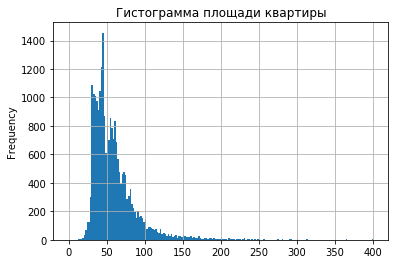

In [52]:
data['total_area'].plot(
    title = 'Гистограмма площади квартиры',
    kind = 'hist',
    bins = 200,
    range = (0, 400),
    grid = True
);

Судя по гистограмме и параметрам метода `describe()`, все вполне ожидаемо - квартир с маленькими и большими площадями гораздо меньше стандартных, которые находятся в пределах от 30 до 75 квадратных метров.

При этом гистограмма не гладкая, есть несколько необычных пиков и после какого-то значения встречаются лишь единичные объявления.

### Цена квартиры

In [53]:
data['last_price'].describe()

count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

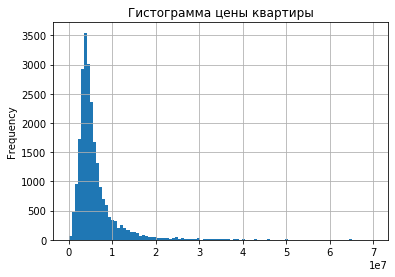

In [54]:
data['last_price'].plot(
    title = 'Гистограмма цены квартиры',
    kind = 'hist',
    bins = 100,
    range = (0, 7e7),
    grid = True
);

Картина примерно похожа на гистограмму площади квартиры. Наиболее часто встречающиеся значения стоимости заключены между 1 млн и 10 млн.

### Число комнат

In [55]:
data['rooms'].describe()

count   23,565.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

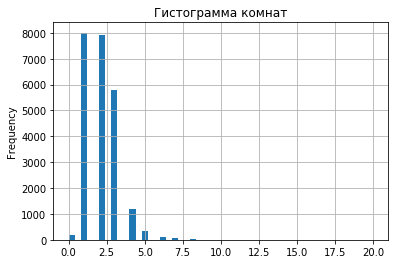

In [56]:
data['rooms'].plot(
    title = 'Гистограмма комнат',
    kind = 'hist',
    bins = 50,
    range = (0, 20),
    grid = True
);

Есть странное значение - число комнат равно 0, чего в принципе не может быть - всегда будет хотя бы одна. В добавок продаются с 19-ю комнатами, что точно не пользуется спросом.

### Высота полотков

In [57]:
data['ceiling_height'].describe()

count   23,565.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

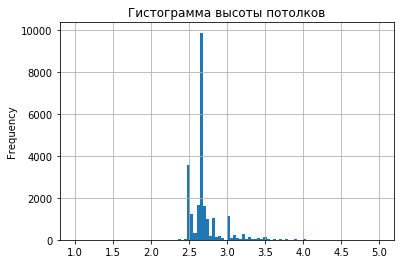

In [58]:
data['ceiling_height'].plot(
    title = 'Гистограмма высоты потолков',
    kind = 'hist',
    bins = 100,
    range = (1, 5),
    grid = True
);

Гистограмма крайне прыгающая, есть множество пиков и провалов. Имеются значения высоты в 1 метр и в 100 метров, что нереально.

### Время продажи квартиры

Помним, что в этом столбце у нас остались пропуски. Мы смотрим на время продажи, то есть если объявление еще не снято с публикации, то будем считать, что объект еще не продан.

In [59]:
notna_days_expos_data = data.loc[data['days_exposition'].notna()]

In [60]:
# проверка
notna_days_expos_data['days_exposition'].isna().sum()

0

In [61]:
notna_days_expos_data['days_exposition'].dtypes

dtype('float64')

In [62]:
notna_days_expos_data['days_exposition'].describe()

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

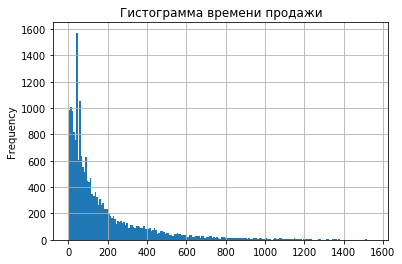

In [63]:
notna_days_expos_data['days_exposition'].plot(
    title = 'Гистограмма времени продажи',
    kind = 'hist',
    bins = 200,
    range = (1, 1550),
    grid = True
);

Видим, что частота появления величины снижается с увеличением количества с момента публикации до момента снятия с публикации. Это значит, что квартиры лучше продаются, в первые недели/месяцы. Так можем судить о том, что быстрые продажи ограничены первым месяцем. Через месяц будем считать, что продажа затянулась.

### Редкие и выбивающиеся значения

#### Значения по цене квартиры

In [64]:
data.sort_values(by='last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,distance_to_nearest_park,ponds_count_around_3000,days_exposition,basis_price,weekday_exposition,month_exposition,year_exposition,floors_category,kitchen_part_area,living_part_area
12971,19,"763,000,000.00",400.00,2017-09-30,7,2.65,10,250.00,10,False,...,530.00,3,33.00,"1,907,500.00",Saturday,September,2017,последний,nan,0.62
19540,8,"420,000,000.00",900.00,2017-12-06,12,2.80,25,409.70,25,False,...,nan,2,106.00,"466,666.67",Wednesday,December,2017,последний,0.12,0.46
14706,15,"401,300,000.00",401.00,2016-02-20,5,2.65,9,204.00,9,False,...,545.00,1,393.00,"1,000,748.13",Saturday,February,2016,последний,0.06,0.51
1436,19,"330,000,000.00",190.00,2018-04-04,3,3.50,7,95.00,5,False,...,519.00,3,233.00,"1,736,842.11",Wednesday,April,2018,другой,0.21,0.50
15651,20,"300,000,000.00",618.00,2017-12-18,7,3.40,7,258.00,5,False,...,nan,2,111.00,"485,436.89",Monday,December,2017,другой,0.11,0.42


In [65]:
data['last_price'].describe()

count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

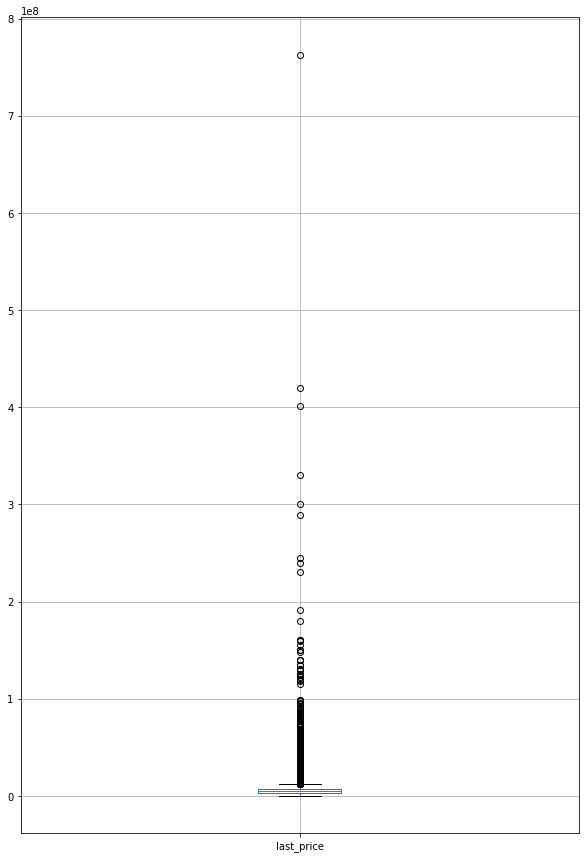

In [66]:
data.boxplot(column='last_price', figsize = (10, 15));

Видим, что минимальная стоимость квартиры 12190 рублей, что совершенно не похоже на правду. При этом из коробчатой диаграммы видно, что значения выше `1.5*IQR` считаются выпадающими - то есть большую часть придется откинуть.

Возьмём данные без этого маленького значения стоимости и слишком большие выбивающиеся значения.

In [67]:
correct_price_data = data.query('last_price > 400000 and last_price < 9000000')

In [68]:
correct_price_data['last_price'].describe()

count      20,180.00
mean    4,482,230.49
std     1,778,472.84
min       430,000.00
25%     3,250,000.00
50%     4,250,000.00
75%     5,600,000.00
max     8,999,999.00
Name: last_price, dtype: float64

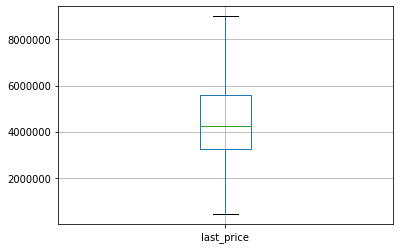

In [69]:
correct_price_data.boxplot(column='last_price');

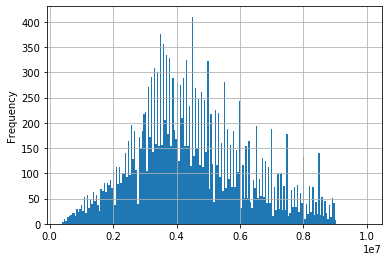

In [70]:
correct_price_data['last_price'].plot(
    kind='hist',
    grid=True,
    bins=200,
    range=(400000, 10000000)
);

#### Значения по числу комнат

Отсортируем по убыванию и посмотрим на квартиры с большим количеством комнат.

In [71]:
data.sort_values(by='rooms', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,distance_to_nearest_park,ponds_count_around_3000,days_exposition,basis_price,weekday_exposition,month_exposition,year_exposition,floors_category,kitchen_part_area,living_part_area
14498,6,"32,250,000.00",374.60,2018-06-09,19,2.65,5,264.50,2,False,...,nan,2,114.00,"86,091.83",Saturday,June,2018,другой,0.07,0.71
18848,6,"28,500,000.00",270.00,2015-03-02,16,3.00,4,180.00,4,False,...,516.00,0,"1,365.00","105,555.56",Monday,March,2015,последний,0.05,0.67
5358,20,"65,000,000.00",590.00,2019-02-14,15,3.50,6,409.00,3,False,...,767.00,0,14.00,"110,169.49",Thursday,February,2019,другой,0.17,0.69
20829,6,"28,659,000.00",245.40,2016-03-31,14,2.65,4,168.30,2,False,...,541.00,2,95.00,"116,784.84",Thursday,March,2016,другой,0.11,0.69
866,5,"25,000,000.00",363.00,2017-12-23,14,3.16,5,222.00,4,False,...,nan,2,418.00,"68,870.52",Saturday,December,2017,другой,0.05,0.61


Возьмём объявления с числом комнат, которые не меньше 1 и не больше 6.

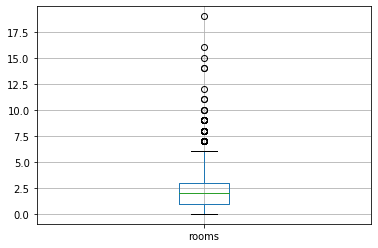

In [72]:
data.boxplot(column='rooms');

In [73]:
correct_rooms_data = data.query('rooms >= 1 and rooms <= 6')

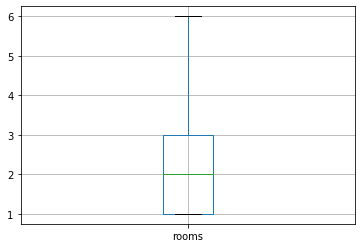

In [74]:
correct_rooms_data.boxplot(column='rooms');

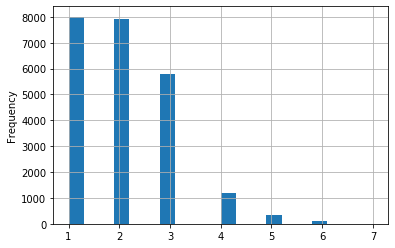

In [75]:
correct_rooms_data['rooms'].plot(
    kind='hist',
    grid=True,
    bins=20,
    range=(1, 7)
);

Таким образом мы отбросили все лишние значения.

#### Значения по высоте потолков

In [76]:
data.sort_values(by='ceiling_height', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,distance_to_nearest_park,ponds_count_around_3000,days_exposition,basis_price,weekday_exposition,month_exposition,year_exposition,floors_category,kitchen_part_area,living_part_area
22869,0,"15,000,000.00",25.00,2018-07-25,1,100.00,5,14.00,5,True,...,223.00,3,19.00,"600,000.00",Wednesday,July,2018,последний,0.44,0.56
3148,14,"2,900,000.00",75.00,2018-11-12,3,32.00,3,53.00,2,False,...,nan,0,nan,"38,666.67",Monday,November,2018,другой,0.11,0.71
22336,19,"9,999,000.00",92.40,2019-04-05,2,32.00,6,55.50,5,False,...,nan,3,nan,"108,214.29",Friday,April,2019,другой,0.18,0.60
21377,19,"4,900,000.00",42.00,2017-04-18,1,27.50,24,37.70,19,False,...,nan,0,61.00,"116,666.67",Tuesday,April,2017,другой,0.26,0.90
5807,17,"8,150,000.00",80.00,2019-01-09,2,27.00,36,41.00,13,False,...,nan,3,38.00,"101,875.00",Wednesday,January,2019,другой,0.15,0.51


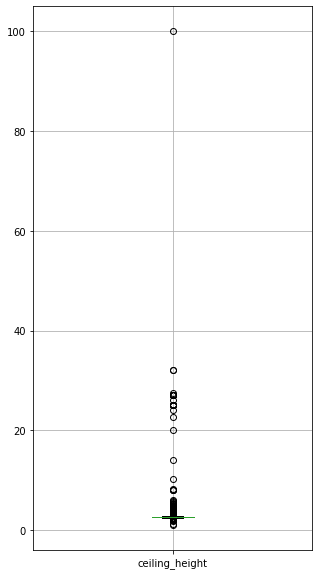

In [77]:
data.boxplot(column='ceiling_height', figsize=(5, 10));

In [78]:
correct_ceil_height_data = data.query('ceiling_height >= 2.45 and ceiling_height <= 2.75')

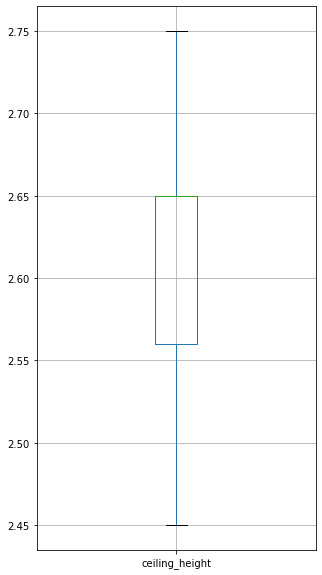

In [79]:
correct_ceil_height_data.boxplot(column='ceiling_height', figsize=(5, 10));

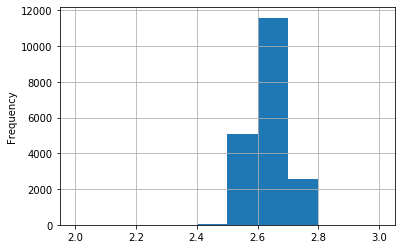

In [80]:
correct_ceil_height_data['ceiling_height'].plot(
    kind='hist',
    grid=True,
    bins=10,
    range=(2, 3)
);

Откорректировали данные для высоты потолка.

#### Значения по времени продажи

Возьмем данные без пропусков:

In [81]:
notna_days_expos_data.sort_values(by='days_exposition', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,distance_to_nearest_park,ponds_count_around_3000,days_exposition,basis_price,weekday_exposition,month_exposition,year_exposition,floors_category,kitchen_part_area,living_part_area
18843,11,"3,500,000.00",48.20,2014-12-15,2,2.50,5,27.40,2,False,...,nan,0,"1,580.00","72,614.11",Monday,December,2014,другой,0.16,0.57
1109,1,"34,878,556.00",95.80,2014-12-09,2,2.65,6,58.30,5,True,...,160.00,3,"1,572.00","364,076.78",Tuesday,December,2014,другой,0.21,0.61
9553,11,"10,600,000.00",80.00,2014-12-09,3,2.85,17,44.00,9,False,...,nan,0,"1,553.00","132,500.00",Tuesday,December,2014,другой,0.19,0.55
1885,2,"13,300,000.00",79.60,2014-12-09,2,3.00,8,42.70,7,False,...,537.00,0,"1,513.00","167,085.43",Tuesday,December,2014,другой,0.23,0.54
20969,18,"13,300,000.00",133.00,2015-02-11,4,3.00,5,58.00,2,False,...,nan,1,"1,512.00","100,000.00",Wednesday,February,2015,другой,0.34,0.44


In [82]:
notna_days_expos_data['days_exposition'].describe()

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

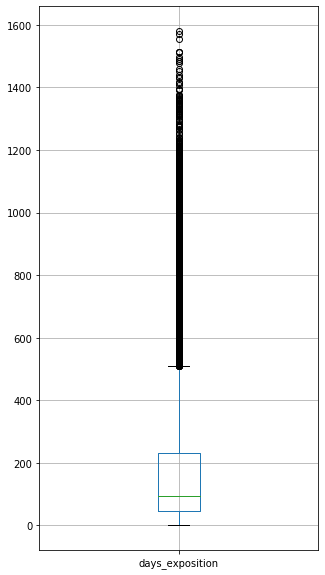

In [83]:
notna_days_expos_data.boxplot(column='days_exposition', figsize=(5, 10));

In [84]:
correct_days_expos_data = notna_days_expos_data.query('days_exposition > 0 and days_exposition <= 284')

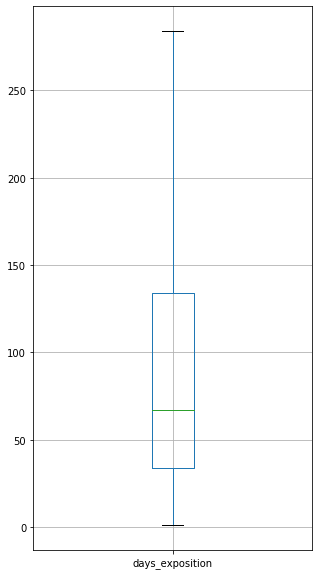

In [85]:
correct_days_expos_data.boxplot(column='days_exposition', figsize=(5, 10));

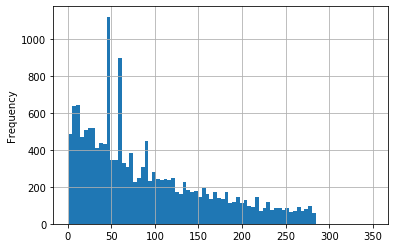

In [86]:
correct_days_expos_data['days_exposition'].plot(
    kind='hist',
    grid=True,
    bins=80,
    range=(1, 350)
);

### Исследовательский анализ

#### Зависимость стоимости от площади, числа комнат, удаленности от центра

Создадим сводную таблицу:

In [87]:
df_addiction = correct_price_data.pivot_table(index='city', values=['total_area', 'rooms', 'distance_to_city_center', 'last_price'])

Рассчитаем коэффицент корреляции Пирсона всех показателей между собой:

In [88]:
df_addiction.corr()

,distance_to_city_center,last_price,rooms,total_area
distance_to_city_center,1.00,-0.09,0.26,0.05
last_price,-0.09,1.00,0.07,0.33
rooms,0.26,0.07,1.00,0.77
total_area,0.05,0.33,0.77,1.00


Построим диаграмму рассеяния для наглядности.

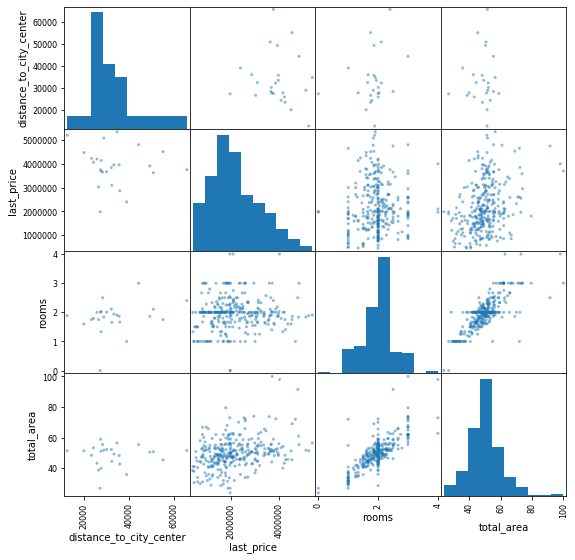

In [89]:
pd.plotting.scatter_matrix(df_addiction, figsize=(9, 9));

Видим, что наибольшее влияние на стоимость оказывает общая площадь. Следующий весомый фактор - количество комнат. Удаленность от центра практически не оказывает никакого влияния.

#### Зависимость стоимости от этажа

In [90]:
df_addiction_floor = correct_price_data.pivot_table(index='city', values=['floors_category', 'last_price', 'floor'])

In [91]:
df_addiction_floor.corr()

,floor,last_price
floor,1.00,0.38
last_price,0.38,1.00


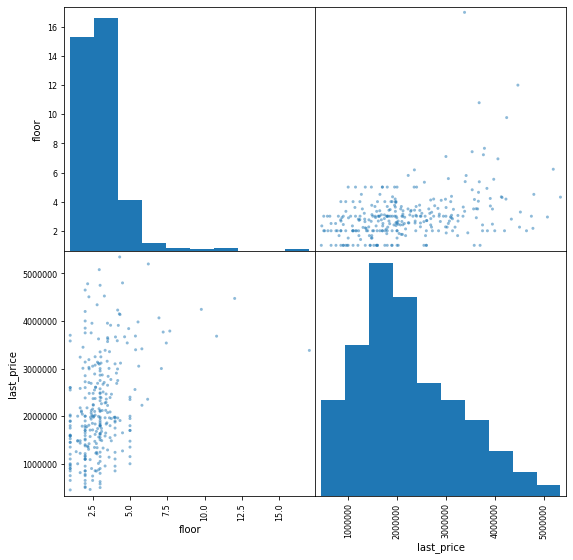

In [92]:
pd.plotting.scatter_matrix(df_addiction_floor, figsize=(9, 9));

Зависимость цены от этажности есть, но не большая. Популярными и, соответственно, дороже в цене будут квартиры ни на первом и не на последнем этажах.

#### Зависимость стоимости от даты размещения

Приведем дни недели и месяцы к числовым категориям:

In [93]:
def correct_weekday(day):
    days = {
        1 : 'Monday',
        2 : 'Tuesday',
        3 : 'Wednesday',
        4 : 'Thursday',
        5 : 'Friday',
        6 : 'Saturday',
        7 : 'Sunday'
    }
    for key, value in days.items():
        if day == value:
            return key

In [94]:
def correct_month(month):
    monthes = {
        1 : 'January',
        2 : 'February',
        3 : 'March',
        4 : 'April',
        5 : 'May',
        6 : 'June',
        7 : 'July',
        8 : 'August',
        9 : 'September',
        10 : 'October',
        11 : 'November',
        12 : 'December'
    }
    for key, value in monthes.items():
        if month == value:
            return key

In [95]:
correct_price_data['category_weekday_expos'] = correct_price_data['weekday_exposition'].apply(correct_weekday)
correct_price_data['category_month_expos'] = correct_price_data['month_exposition'].apply(correct_month)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Теерь можно создавать сводную таблицу:

In [96]:
df_addiction_date = correct_price_data.pivot_table(
    index='city', 
    values=[
        'first_day_exposition',
        'last_price',
        'category_weekday_expos',
        'category_month_expos',
        'year_exposition'
    ]
)
df_addiction_date

,category_month_expos,category_weekday_expos,last_price,year_exposition
city,,,,
Агалатово,4.75,4.50,"3,567,500.00","2,017.75"
Александровская,6.00,4.00,"3,750,000.00","2,016.00"
Алексеевка,7.00,7.00,"1,000,000.00","2,017.00"
Аннино,5.81,3.62,"3,116,114.38","2,017.38"
Аро,2.33,5.33,"3,240,000.00","2,018.33"
...,...,...,...,...
Юкки,7.50,2.50,"3,187,500.00","2,017.25"
Ялгино,1.00,2.00,"777,000.00","2,019.00"
Яльгелево,5.50,3.50,"2,575,000.00","2,018.17"


Приведем типы данных сводной таблицы к целочисленным, кроме стоимости квартиры.

In [97]:
df_addiction_date['category_weekday_expos'] = df_addiction_date['category_weekday_expos'].astype('int64')
df_addiction_date['category_month_expos'] = df_addiction_date['category_weekday_expos'].astype('int64')
df_addiction_date['year_exposition'] = df_addiction_date['year_exposition'].astype('int64')

Коэффициент корреляции:

In [98]:
df_addiction_date.corr()

,category_month_expos,category_weekday_expos,last_price,year_exposition
category_month_expos,1.00,1.00,-0.12,0.03
category_weekday_expos,1.00,1.00,-0.12,0.03
last_price,-0.12,-0.12,1.00,-0.17
year_exposition,0.03,0.03,-0.17,1.00


Построим диаграмму рассеяния:

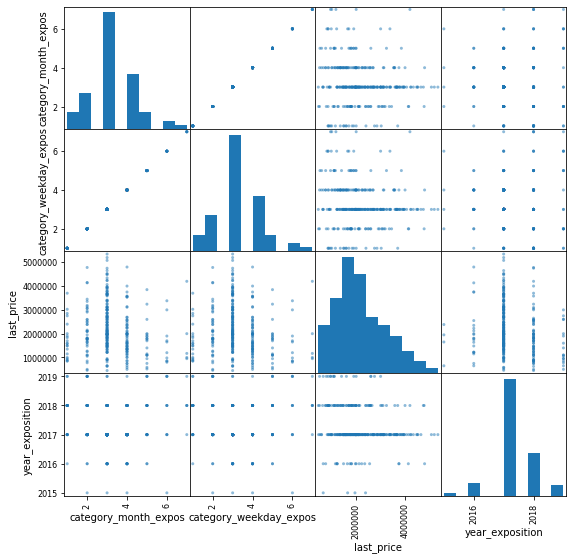

In [99]:
pd.plotting.scatter_matrix(df_addiction_date, figsize=(9, 9));

Взаимосвязи с датой публикации практически нет.

#### Населенные пункты с низкой и высокой стоимостью жилья

Создадим сводную таблицу по городам со столбцом стоимости 1 квадратного метра жилья и посчитаем среднее для каждого города:

In [100]:
df_city_basis_price_mean = data.pivot_table(index='city', values='basis_price', aggfunc='mean')

Найдем топ-10 по средней стоимости 1 квадратного метра:

In [101]:
top_df_basis_price_mean = df_city_basis_price_mean.sort_values(by='basis_price', ascending=False).head(10)

Построим стобчатую диаграмму для наглядности:

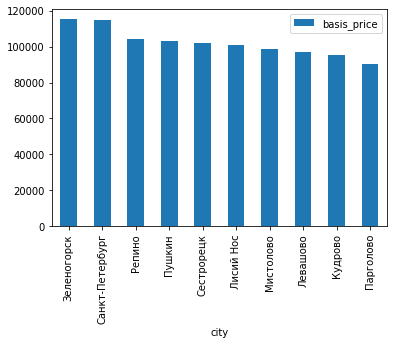

In [102]:
top_df_basis_price_mean.plot(y = 'basis_price', kind='bar');

#### Определение области центра Санкт-Петербурга

Помним, что у нас остались пропуски:

In [103]:
data['distance_to_city_center'].isna().sum()

5501

Выберем данные без пропусков:

In [104]:
full_df_copy = correct_price_data.loc[data.loc[:, 'distance_to_city_center'].notna()]

Переведем расстояние до центра в километры:

In [105]:
def convert_to_km(m):
    return round(m / 1000)

In [106]:
full_df_copy.loc[:, 'distance_to_city_center_km'] = full_df_copy.loc[:, 'distance_to_city_center'].apply(convert_to_km)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Выделим данные, относящиеся только к городу Санкт-Петербург:

In [107]:
full_df_spb = full_df_copy.query('city == "Санкт-Петербург"')

Сгруппируем данные по расстоянию в километрах и найдем среднюю цену для каждого:

In [108]:
mean_price_for_km = full_df_spb.groupby('distance_to_city_center_km')['last_price'].mean()

Строим график:

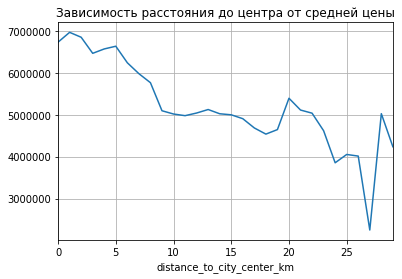

In [109]:
mean_price_for_km.plot(
    grid=True,
    title='Зависимость расстояния до центра от средней цены'
);

У графика зависимости средней цены от расстояния до центра в километрах несколько границ, где он сильно меняется. Скорее всего центральная зона расположена в пределах от 0 до 4-7 км.

#### Квартиры в центре Санкт-Петербурга

##### Зависимость стоимости от площади, числа комнат, высоты потолков

In [110]:
full_df_spb.query('distance_to_city_center_km <= 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,basis_price,weekday_exposition,month_exposition,year_exposition,floors_category,kitchen_part_area,living_part_area,category_weekday_expos,category_month_expos,distance_to_city_center_km
24,8,"6,500,000.00",97.20,2015-10-31,2,2.65,3,46.50,1,False,...,"66,872.43",Saturday,October,2015,первый,0.20,0.48,6,10,2
61,18,"7,990,000.00",74.00,2017-08-24,2,2.65,4,43.00,4,False,...,"107,972.97",Thursday,August,2017,последний,0.27,0.58,4,8,4
94,3,"3,500,000.00",29.50,2019-04-26,1,2.50,5,15.60,2,False,...,"118,644.07",Friday,April,2019,другой,0.19,0.53,5,4,7
111,4,"4,590,000.00",40.00,2017-05-29,1,2.65,6,18.00,1,False,...,"114,750.00",Monday,May,2017,первый,0.25,0.45,1,5,6
114,5,"4,000,000.00",21.40,2019-02-07,1,2.90,8,8.30,7,False,...,"186,915.89",Thursday,February,2019,другой,0.29,0.39,4,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,"5,000,000.00",38.00,2018-06-23,1,2.55,16,nan,15,False,...,"131,578.95",Saturday,June,2018,другой,nan,nan,6,6,7
23644,7,"4,990,000.00",62.50,2018-04-26,2,2.70,4,32.30,4,False,...,"79,840.00",Thursday,April,2018,последний,0.19,0.52,4,4,4
23665,11,"4,250,000.00",47.00,2016-05-20,1,2.65,6,18.20,1,False,...,"90,425.53",Friday,May,2016,первый,0.31,0.39,5,5,5
23681,13,"5,250,000.00",43.00,2018-05-11,2,2.50,5,29.00,2,False,...,"122,093.02",Friday,May,2018,другой,0.14,0.67,5,5,7


In [111]:
spb_df_addiction = full_df_spb.pivot_table(
    index='distance_to_city_center_km', 
    values=['total_area', 'rooms', 'ceiling_height', 'last_price']
)

In [112]:
spb_df_addiction.corr()

,ceiling_height,last_price,rooms,total_area
ceiling_height,1.00,0.62,0.62,0.64
last_price,0.62,1.00,0.85,0.83
rooms,0.62,0.85,1.00,0.92
total_area,0.64,0.83,0.92,1.00


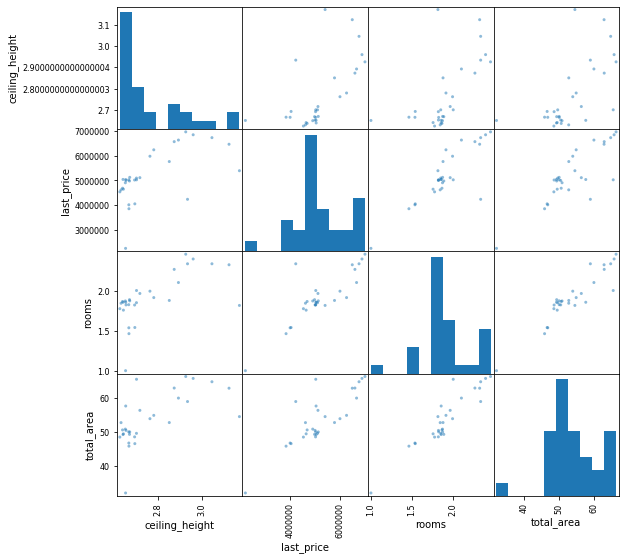

In [113]:
pd.plotting.scatter_matrix(spb_df_addiction, figsize=(9, 9));

В районе центра на цену квартиры влияет всё. По возрастанию влияния: высота потолков, количество комнат, общая площадь.

##### Зависимость стоимости от этажа, числа комнат,удаленности от центра

Проверим дополнительные параметры для квартир в центре.

In [114]:
spb_df_addiction_another = full_df_spb.pivot_table(
    index='distance_to_city_center_km', 
    values=['rooms', 'floor', 'distance_to_city_center', 'last_price']
)

In [115]:
spb_df_addiction_another.corr()

,distance_to_city_center,floor,last_price,rooms
distance_to_city_center,1.00,0.35,-0.86,-0.63
floor,0.35,1.00,-0.28,-0.40
last_price,-0.86,-0.28,1.00,0.85
rooms,-0.63,-0.40,0.85,1.00


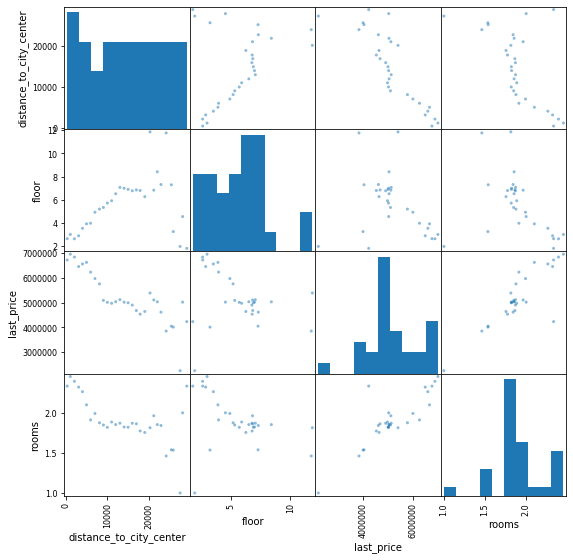

In [116]:
pd.plotting.scatter_matrix(spb_df_addiction_another, figsize=(9, 9));

В центральных районах дополнительные параметры также оказывают бОльшее влияние. По возрастанию: этаж, удаленность от центра, количество комнат. 

##### Зависимость стоимости от даты публикации

Посмотрим на зависимость от даты публикации.

In [117]:
df_addiction_date_spb = full_df_spb.pivot_table(
    index='distance_to_city_center_km', 
    values=[
        'first_day_exposition',
        'last_price',
        'category_weekday_expos',
        'category_month_expos',
        'year_exposition'
    ]
)

In [118]:
df_addiction_date_spb.corr()

,category_month_expos,category_weekday_expos,last_price,year_exposition
category_month_expos,1.00,0.32,0.40,-0.64
category_weekday_expos,0.32,1.00,0.64,-0.05
last_price,0.40,0.64,1.00,-0.48
year_exposition,-0.64,-0.05,-0.48,1.00


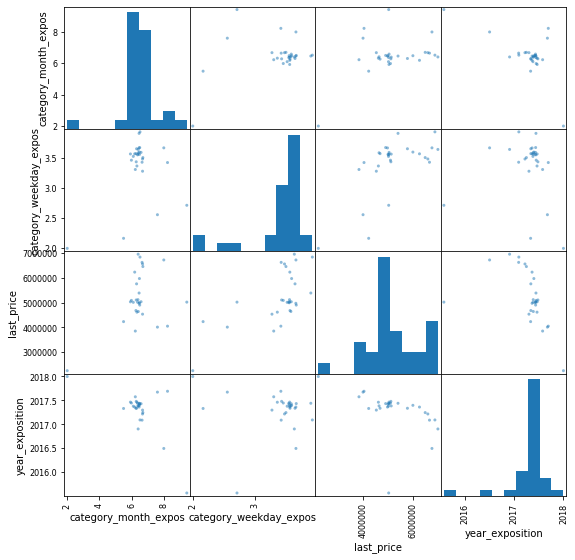

In [119]:
pd.plotting.scatter_matrix(df_addiction_date_spb, figsize=(9, 9));

Так же, как и для всех городов - в центре Санкт-Петербурга влияние даты небольшое. Наибольшее оказывает год публикации.

## Общий вывод

Рыночная стоимость объектов недвижимости зависит от многих факторов. Самые явные из них мы проверили и пришли к выводу, что их влияние на стоимость недвижимости достаточно велико. При этом влияние увеличивается по мере приближения к центральному району города.

При этом имеют место погрешности вычислений и исследований в силу наличия пропусков данных, которые нет возможности заполнить без помощи владельца объявления или систем, отвечающих за картографию.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод